In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as stat
import seaborn as sea
import pandas as pd
from pandas.plotting import scatter_matrix
import scipy.stats as stats
import statsmodels.api as sm
#from day_1 import mean_CI_model, mean_CI_data, mean_PI_model, mean_PI_data
import pandas.plotting as pd_plot
import scipy as sc

In [4]:
def mean_CI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = se * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96 / np.sqrt(n)
    return m, m - h, m + h


def mean_CI_model(mu, std, n, confidence=0.95):
    m = mu
    h = stats.norm.pdf((1 - confidence) / 2) * std / np.sqrt(n)
    return m, m - h, m + h


def mean_PI_data(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, std = np.mean(a), np.std(a)
    #h = std * sc.stats.t.ppf((1 + confidence) / 2., n - 1)
    h = std * 1.96
    return m, m - h, m + h


def mean_PI_model(mu, std, confidence=0.95):
    m = mu
    h = stats.norm.pdf((1 - confidence) / 2) * std
    return m, m - h, m + h

def BootStrap(data1, data2, n=1000):
    BootData = pd.concat([data1, data2])
    ObsDiff = np.mean(data1)-np.mean(data2)
    BootDiff = []
    for m in range(n):
        ShuffledData = np.random.choice(BootData, len(BootData)) 
        m1 = np.mean(ShuffledData[0:len(data1)])
        m2 = np.mean(ShuffledData[len(data1):])
        BootDiff.append(m1-m2)
    pval = len(np.where(np.abs(BootDiff) > abs(ObsDiff))[0])/n
    
    mu, std = stats.norm.fit(BootDiff)
    x = np.linspace(np.min(BootDiff), np.max(BootDiff))
    p = stats.norm.pdf(x, mu, std)
    
    plt.figure()
    plt.hist(BootDiff, density=True, bins=25, label='$\mu$ freq.')
    plt.plot(x, p, label='N-fit')
    plt.axvline(ObsDiff, linestyle='--', color='r', label='Obs.')
    plt.grid()
    plt.legend()
    
    print('\n Sample sizes: Data 1:',str(len(data1)),' Data 2:', str(len(data2)),\
          '\n Number of permutations: ', str(n))
    print('\n p-value: ', str(pval))
    
    return BootDiff, pval, std

# Exercise 2.1

The fish oil supplement data, fishoil.dta, contains the difference in systolic blood
pressure. In this exercise we will consider the possible effect of fish oil supplement on the
increase in systolic blood pressure and go through an analysis similar to the one you saw
at the lecture

1) Make Q-Q plots of the difference in systolic blood pressure for each of the two
groups. What are your comments to the plots

In [1]:
fish_oil = pd.read_csv('data/fishoil.csv', sep=',', na_values=".")
print(fish_oil)

fish_oil_C = fish_oil.loc[fish_oil['group'] != 'Fish oil']
fish_oil_F = fish_oil.loc[fish_oil['group'] == 'Fish oil']

## histogram
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)

mu, std = stats.norm.fit(fish_oil_C['systol'])
x = np.linspace(-80, 80)
pdf_data = stats.norm.pdf(x, mu, std)
ax.plot(x, pdf_data, color='blue', label='Control')
ax.hist(fish_oil_C['systol'], bins=20, density='True', color='blue', alpha=0.7)

mu, std = stats.norm.fit(fish_oil_F['systol'])
pdf_data = stats.norm.pdf(x, mu, std)
ax.plot(x, pdf_data, color='orange', label='Fish oil')
ax.hist(fish_oil_F['systol'], bins=20, density='True', color='orange', alpha=0.7)

ax.set_xlabel('Systolic pressure')
ax.set_ylabel('Density')
ax.legend()
ax.grid()
plt.show()

## QQ plot
plt.rcParams.update({'font.size': 10})
sm.qqplot(fish_oil_F['systol'], fit=True, line='45')
plt.title('Fish oil group')
plt.grid()
plt.show()

plt.rcParams.update({'font.size': 10})
sm.qqplot(fish_oil_C['systol'], fit=True, line='45')
plt.title('Control group')
plt.grid()
plt.show()

NameError: name 'pd' is not defined

The data seems to be well described by a normal distribution.
The "Fish oil" group seems to have a slightly higher difference in systolic blood pressure,
but we don't know if it's significant yet.

2) Make a short description of the difference in systolic blood pressure using
bysort group:summarize systol, detail and ttest systol, by(group).
Comment on the descriptives (not the test!).

In [6]:
print('Describing the Control group:')
print(fish_oil_C.describe(), '\n')
print('Confidence interval: ', mean_CI_data(fish_oil_C['systol'])[1:])
print('Prediction interval: ', mean_PI_data(fish_oil_C['systol'])[1:])
print('2-sided ttest: ', stats.ttest_1samp(fish_oil_C['systol'], np.mean(fish_oil_C['systol'])))

print('Describing the fish oil group:')
print(fish_oil_F.describe())
print('Confidence interval: ', mean_CI_data(fish_oil_F['systol'])[1:])
print('Prediction interval: ', mean_PI_data(fish_oil_F['systol'])[1:])
print('2-sided ttest: ', stats.ttest_1samp(fish_oil_F['systol'], np.mean(fish_oil_F['systol'])))

Describing the Control group:
            obsno      systol     diastol
count  213.000000  213.000000  213.000000
mean   107.000000    1.403756    1.901408
std     61.631972   14.571113    7.528853
min      1.000000  -84.000000  -28.000000
25%     54.000000   -5.000000   -3.000000
50%    107.000000    2.000000    2.000000
75%    160.000000   10.000000    7.000000
max    213.000000   54.000000   29.000000 

Confidence interval:  (-0.5485017893642428, 3.3560135264534448)
Prediction interval:  (-27.08850662656051, 29.89601836364971)
2-sided ttest:  Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Describing the fish oil group:
            obsno      systol     diastol
count  217.000000  217.000000  217.000000
mean   322.000000    2.723502    2.193548
std     62.786676   14.690544    8.364904
min    214.000000  -44.000000  -28.000000
25%    268.000000   -7.000000   -3.000000
50%    322.000000    2.000000    2.000000
75%    376.000000   12.000000    7.000000
max    430.000000   48.000000   31.0

3) Test the hypothesis of the common standard deviation in the two groups.

In [7]:
# scipy.stats.ttest_ind: two-sided test for the null hypothesis that 2 independent samples
# have identical average (expected) values. It assumes that the populations have IDENTICAL
# variances by default
#print(stats.ttest_ind(fish_oil_C['systol'], fish_oil_F['systol']))

# We need to test that! Testing the hypothesis std_control = std_fish_oil is done by considering
# the ratio between the two estimated standard deviations
# F_obs = [largest observed std/ smallest observed std]^2
std_f = np.std(fish_oil_F['systol'])
std_c = np.std(fish_oil_C['systol'])
print('Control group: std =', std_c)
print('Fish oil group: std =', std_f)

if std_c >= std_f:
    F_obs = (std_c/std_f)**2
else:
    F_obs = (std_f/std_c)**2

print('F_obs =', F_obs)
p_value = stats.f.cdf(F_obs, len(fish_oil_C['systol']) - 1, len(fish_oil_F['systol']) - 1)
print('p-value =', p_value)

Control group: std = 14.536868619951587
Fish oil group: std = 14.656655765923484
F_obs = 1.0165483620928653
p-value = 0.5478904945832221


The observed variance F_obs is 1.6% higher for the control group. The p-value of 55%
means that the difference may be due to sampling variance -> we can accept that std_c = std_f

4) Return to the output from the t-test command and write a conclusion on the
possible effect of fish oil on the change in systolic blood pressure during pregnancy.
The conclusion should contain information on size of the possible effect, whether or
not it is statistical significant and a discussion on the validity of the assumptions
behind the statistical analysis.

In [8]:
# now that we tested, and assumed correct, the hypothesis of the common standard deviation
# in the two groups, we can do a t-test:
print('2-sided ttest: ', stats.ttest_ind(fish_oil_F['systol'],fish_oil_C['systol']))

2-sided ttest:  Ttest_indResult(statistic=0.93516195642692, pvalue=0.35023215803959706)


We found a very high p-value when comparing the two samples, p=35%. Therefore, we can
conclude that the difference observed is NOT statistically significant. We cannot reject the
null hypothesis

## Exercise 2.2
In the experiment above two women in the control group had a decrease in the systolic
blood pressure of more than 50 mmHg.

1) Exclude these two women and repeat the analysis above. How does this affect your
conclusions?

In [9]:
fish_oil_C_rem_outl = []
for i in range(0, len(fish_oil_C['systol'])):
    if fish_oil_C['systol'][i] < -50:
        fish_oil_C_rem_outl.append(fish_oil_C['systol'][i])

# testing the hypothesis of common std
std_f = np.std(fish_oil_F['systol'])
std_c = np.std(fish_oil_C_rem_outl)
print('Control group: std =', std_c)
print('Fish oil group: std =', std_f)

if std_c >= std_f:
    F_obs = (std_c/std_f)**2
else:
    F_obs = (std_f/std_c)**2

print('F_obs =', F_obs)
p_value = stats.f.cdf(F_obs, len(fish_oil_C_rem_outl) - 1, len(fish_oil_F['systol']) - 1)
print('p-value =', p_value)

# High p-value -> we accept that the difference is due to sampling variance

#Doing a t-test
print('1-sided ttest: ', stats.ttest_ind(fish_oil_F['systol'],fish_oil_C_rem_outl))

Control group: std = 14.0
Fish oil group: std = 14.656655765923484
F_obs = 1.0960079502080518
p-value = 0.7036860617879118
1-sided ttest:  Ttest_indResult(statistic=6.9557553425664915, pvalue=4.07428634689188e-11)


Removing the two outliers we get a very small p-value. This would mean that the difference
observed IS statistically significant. But we are removing data points, so let's continue
the analysis...

2) The approach of excluding the potential ourliers is easy, but we are then no longer
analyzing the complete data. Another approach is to estimate the standard error using a
resampling technique called bootstrap. Here we create similar studies by sampling data
from each of the two groups with replacement and compute estimated differences in
2 means in each study. The variation between these estimated means is an estimate of the
standard error. The bootstrap technique does not require that the observations follow a
normal distribution. The command bootstrap dif=(r(mu_2)-r(mu_1)), reps(1000): ttest systol , by(group)
Compare the results of the bootstrap to the t-test used in Exercise 2.1.


In [10]:
from bootstrap_stat import bootstrap_stat as bp
comb = [fish_oil_F['systol'], fish_oil_C['systol']]
dist = bp.EmpiricalDistribution(comb)

def statistic(comb):
    return np.mean(comb[0]) - np.mean(comb[1])

print('Standard error = ', bp.standard_error(dist, statistic, B=1000))
print(bp.t_interval(dist, statistic, statistic(comb)))
# the confidence intervals are not working - see why
#ci_low, ci_high = bp.bcanon_interval(dist, statistic, comb, alpha=0.025)
#print(ci_low, ci_high)

Standard error =  0.9177539710822442
(1.3197464356028643, inf)


C:\Users\liabar\AppData\Roaming\Python\Python37\site-packages\bootstrap_stat\bootstrap_stat.py:688: RuntimeWarning: divide by zero encountered in true_divide
  z_star = (theta_star - theta_hat) / se_star


## Exercise 2.3

The data set hp.dta contains data on the heart period (the average time in ms between two
consecutive heart beats) during night and day for a group of healthy persons divided into
physically active and passive persons.

1) Describe the heart period during day for the ‘active’ and the ‘passive’ persons

      group   day  night
0   passive   740    923
1   passive   779    922
2    active  1045   1355
3    active   714    849
4   passive   772   1006
..      ...   ...    ...
94  passive   677    894
95  passive   727    932
96  passive   805    933
97  passive  1005   1232
98   active  1047   1310

[99 rows x 3 columns]
Active group
                day        night
count    34.000000    34.000000
mean    854.617647  1070.617647
std     116.375571   160.458626
min     631.000000   753.000000
25%     763.000000   950.250000
50%     852.000000  1048.000000
75%     910.500000  1168.000000
max    1199.000000  1456.000000 
 

Passive group
                day        night
count    65.000000    65.000000
mean    777.707692   947.323077
std      96.584277   125.071493
min     625.000000   710.000000
25%     711.000000   882.000000
50%     771.000000   930.000000
75%     813.000000  1002.000000
max    1125.000000  1415.000000


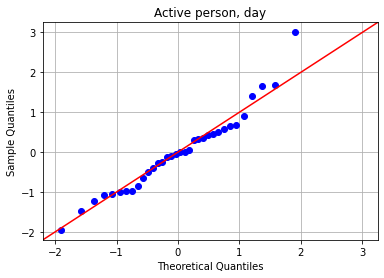

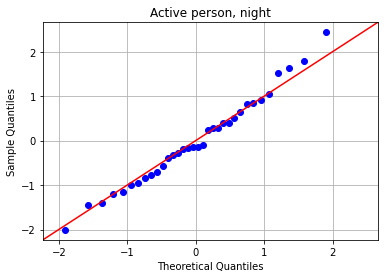

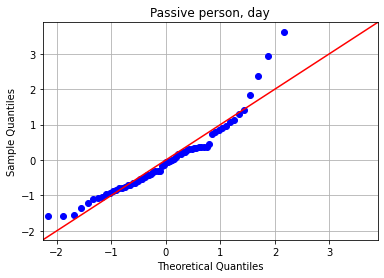

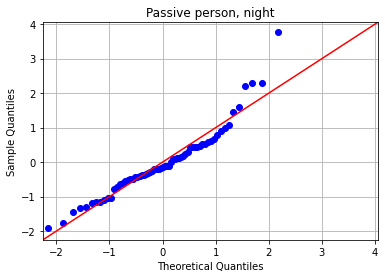

In [11]:
Heart = pd.read_csv('data/hp.csv', sep=',', na_values=".")
print(Heart)
Heart_active = Heart.loc[Heart['group'] == 'active']
Heart_passive = Heart.loc[Heart['group'] == 'passive']

print('Active group\n', Heart_active.describe(), '\n \n')
print('Passive group\n', Heart_passive.describe())

## QQ plot
plt.rcParams.update({'font.size': 10})
sm.qqplot(Heart_active['day'], fit=True, line='45')
plt.title('Active person, day')
plt.grid()
plt.show()

plt.rcParams.update({'font.size': 10})
sm.qqplot(Heart_active['night'], fit=True, line='45')
plt.title('Active person, night')
plt.grid()
plt.show()

plt.rcParams.update({'font.size': 10})
sm.qqplot(Heart_passive['day'], fit=True, line='45')
plt.title('Passive person, day')
plt.grid()
plt.show()

plt.rcParams.update({'font.size': 10})
sm.qqplot(Heart_passive['night'], fit=True, line='45')
plt.title('Passive person, night')
plt.grid()
plt.show()


2) Calculate a 95% prediction interval for the heart period for a passive person
during day. Do the same for the active group. Compare the intervals and comment
on whether these are valid 95%-prediction intervals.

C:\Users\liabar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\liabar\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


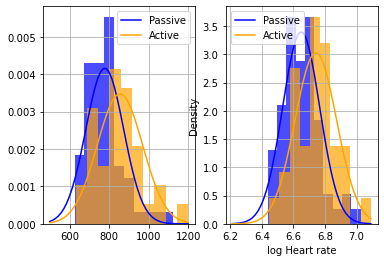

Passive person, daytime: 95% PI =  (777.7076923076924, 589.864347021311, 965.5510375940737)
Active person, daytime: 95% PI =  (854.6176470588235, 629.900915713085, 1079.334378404562)
Log transform Passive person, daytime: 95% PI =  [772.21145326 613.5465844  971.90750257]
Log transform Active person, daytime: 95% PI =  [ 847.1773736   654.54201286 1096.50639414]


In [22]:
# Log transform
Heart_active['log day'] = np.log(Heart_active['day'])
Heart_passive['log day'] = np.log(Heart_passive['day'])

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 2)
mu, std = stats.norm.fit(Heart_passive['day'])
x = np.linspace(500, 1200)
pdf_data = stats.norm.pdf(x, mu, std)
ax[0].plot(x, pdf_data, color='blue', label='Passive')
ax[0].hist(Heart_passive['day'], bins=10, density='True', color='blue', alpha=0.7)

mu, std = stats.norm.fit(Heart_active['day'])
pdf_data = stats.norm.pdf(x, mu, std)
ax[0].plot(x, pdf_data, color='orange', label='Active')
ax[0].hist(Heart_active['day'], bins=10, density='True', color='orange', alpha=0.7)
ax[0].legend()
ax[0].grid()

mu, std = stats.norm.fit(Heart_passive['log day'])
x = np.linspace(np.log(500), np.log(1200))
pdf_data = stats.norm.pdf(x, mu, std)
ax[1].plot(x, pdf_data, color='blue', label='Passive')
ax[1].hist(Heart_passive['log day'], bins=10, density='True', color='blue', alpha=0.7)

mu, std = stats.norm.fit(Heart_active['log day'])
pdf_data = stats.norm.pdf(x, mu, std)
ax[1].plot(x, pdf_data, color='orange', label='Active')
ax[1].hist(Heart_active['log day'], bins=10, density='True', color='orange', alpha=0.7)

ax[1].set_xlabel('log Heart rate')
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].grid()
plt.show()

print('Passive person, daytime: 95% PI = ', mean_PI_data(Heart_passive['day']))
print('Active person, daytime: 95% PI = ', mean_PI_data(Heart_active['day']))
print('Log transform Passive person, daytime: 95% PI = ', np.exp(mean_PI_data(Heart_passive['log day'])))
print('Log transform Active person, daytime: 95% PI = ', np.exp(mean_PI_data(Heart_active['log day'])))

The 95% PI is not valid for the non-transformed sample, as the data cannot be well approximated by a normal
distribution - especially the "passive" group. The log transformed analysis
is a little better, but it still doesn't look completely correct

3) Compare the heart period during day in the two groups. The comparison should
(among other things) include a non-parametric test of no difference between the two
groups.

In [21]:
#First, we test the std_p = std_a hypothesis for the log transformed data:
std_p = np.std(np.log(Heart_passive['day']))
std_a = np.std(np.log(Heart_active['day']))

if std_a >= std_p:
    F_obs = (std_a/std_p)**2
else:
    F_obs = (std_p/std_a)**2

print('F_obs =', F_obs)
p_value = stats.f.cdf(F_obs, len(Heart_active['day']) - 1, len(Heart_passive['day']) - 1)
print('(std_p==std_a) p-value =', p_value)
# High p-value -> we accept that the difference is due to sampling variance

#Doing a t-test
print('2-sided ttest: ', stats.ttest_ind(np.log(Heart_active['day']),
                                         np.log(Heart_passive['day'])))

# we will use the Mann-Whitney U test: a non-parametric test for the
# null hypothesis
mann_whitney = stats.mannwhitneyu(Heart_active['day'], Heart_passive['day'])
print('Mann-Whitney test: ', mann_whitney)

F_obs = 1.2580238176405074
(std_p==std_a) p-value = 0.7864622346976272
1-sided ttest:  Ttest_indResult(statistic=3.5390532654052405, pvalue=0.0006183790857125774)
Mann-Whitney test:  MannwhitneyuResult(statistic=626.0, pvalue=0.0002109033499639401)


First we tested to see if the variance of the two groups is the same; this has a high
p-value, so we can accept that the difference is due to sampling variance. Additionally,
when testing for the null hypothesis (of the two data sets being the same) we get a
small p-value, indicating that the difference observed is statistically significant (with
parametric t-test AND the non-parametric Mann-Whitney test)

4) Write a conclusion on the possible difference between the heart period during the
day for physical active and passive persons. The conclusion should contain
information on size of the possible difference, whether or not it is statistical
significant and a discussion on the validity of the assumptions behind the statistical
analysis.

We found a statistically significant difference between the heart rates of active and
not active people during the day time. Assuming a normal distribution of the log-transformed
data, the mean value for the passive group was 772 (95% PI = 613, 971). For the active
group, this was 847 (95% PI = 654, 1096). The difference was statistically significant
for both a parametric (p = 0.0006) and non-parametric tests (p = 0.0002).

## Exercise 2.4
This exercise focuses on power and sample size calculations. Consider the study on
diastolic blood pressure (DBP) used in the lecture on sample size calculation.

1) Suppose that you want to design a study comparing two groups, with the same
standard deviation (sd=8) and a hypothesised difference in means of 5:
How many participants should you have in each group to obtain a power of 90%.

# participants for a power of 90% =  69


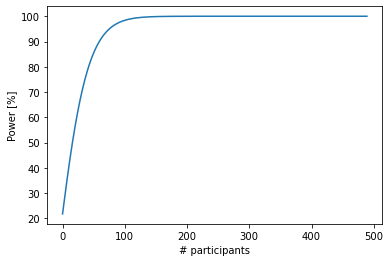

In [57]:
import statsmodels

power = []
for n_obs in range(10, 500):
    pow = statsmodels.stats.power.TTestIndPower.power(self=pow, effect_size=5/9, nobs1=n_obs,
                                                             alpha=0.05, ratio=1)
    power.append(100*pow)
    if pow >= 0.899 and pow<=0.901:
        print('# participants for a power of 90% = ', n_obs)

plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(1, 1)
ax.plot(power)
ax.set_xlabel('# participants')
ax.set_ylabel('Power [%]')
plt.show()

2) Now, suppose that you have planned a study with one intervention group and one
control group both with 200 participants. Your plan is to compare the systolic blood
pressure in the two groups and you expect the mean SBP in the control group to be
130 mmHg and in the intervention group to be 125 mmHg. Furthermore, your best
guess is that the standard deviation in both groups will be 25 mmHg. Determine the
statistical power of this study.

In [59]:
pow = statsmodels.stats.power.TTestIndPower.power(self=pow, effect_size=(130-125)/25,
                                                  nobs1=200, alpha=0.05, ratio=1)
print('The statistical power of this study is: ', pow*100, '%')

The statistical power of this study is:  51.40816347005528 %


## Exercise 2.5
We continue with heart period data, hp.dta. Generate a new variable containing the
natural logarithm of the heart period during day (i.e. log(day)).

1. Repeat what you did in exercise 2.3 on this variable.
 - Done in the exercise 2.3 - the data was not normally distributed without a log transformation.
2. Comment on the similarities and differences on the two set of analyses.


## Exercise 2.6
Here we will return to the birth of sib pairs we considered last week.
Again we will restrict the analysis to sib pairs where the oldest is a boy.

1. Compare the birth weight of the youngest for girls and boys.
Write a conclusion of the analysis. (The conclusion should contain information on
size of the possible difference, whether or not it is statistical significant and a
discussion on the validity of the assumptions behind the statistical analysis.)

2. Compare the difference in birth weight for the two sibs if the youngest is a girl to
the difference if the youngest is a boy. Write a conclusion of the analysis. (The
conclusion should contain information on size of the possible effect, whether or not
it is statistical significant and a discussion on the validity of the assumptions behind
the statistical analysis.)

3. Comment on the similarities and differences between the two analyses and results.

# read more on paired and unpaired t-test!!

p-value = 2% ? (more or less)